# **1. Perkenalan Dataset**


Sumber Dataset: https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data/

Dataset "Jobs in Data" ini merupakan kumpulan data komprehensif yang berfokus pada lowongan pekerjaan di bidang data, mencakup berbagai atribut penting seperti tahun kerja, jabatan, kategori pekerjaan, gaji serta gaji dalam USD, lokasi karyawan dan perusahaan, tingkat pengalaman, tipe pekerjaan, pengaturan kerja, dan ukuran perusahaan. Dataset ini sangat bermanfaat bagi peneliti, analis data, dan praktisi HR untuk memahami tren pasar tenaga kerja di sektor data, melakukan analisis kompensasi, dan mengidentifikasi pola serta perbedaan berdasarkan faktor-faktor yang dapat mendukung pengambilan keputusan yang lebih tepat di dunia kerja yang dinamis.


Dataset ini berisi **9355 baris data** dan **12 kolom** yang terdiri dari:
- **work_year (Numerikal):** Tahun di mana data dicatat. Kolom ini menunjukkan konteks temporal data, penting untuk memahami tren gaji dari waktu ke waktu.
- **job_title (Kategorikal):** Judul spesifik dari peran pekerjaan, seperti 'Data Scientist', 'Data Engineer', atau 'Data Analyst'. Kolom ini sangat penting untuk memahami distribusi gaji di berbagai peran khusus dalam bidang data.
- **job_category (Kategorikal):** Klasifikasi peran pekerjaan ke dalam kategori yang lebih luas untuk analisis yang lebih mudah. Ini mungkin mencakup bidang-bidang seperti 'Analisis Data', 'Pembelajaran Mesin', 'Rekayasa Data', dll.
- **salary_currency (Kategorikal):** Mata uang di mana gaji dibayarkan, seperti USD, EUR, dll. Ini penting untuk konversi mata uang dan memahami nilai sebenarnya dari gaji dalam konteks global.
- **salary (Numerikal):** Gaji kotor tahunan peran dalam mata uang lokal. Angka gaji mentah ini adalah kunci untuk perbandingan gaji regional langsung.
- **salary_in_usd (Numerikal):** Gaji kotor tahunan yang dikonversi ke Dolar Amerika Serikat (USD). Konversi mata uang seragam ini membantu dalam perbandingan dan analisis gaji global.
- **employee_residence (Kategorikal):** Negara tempat tinggal karyawan. Titik data ini dapat digunakan untuk mengeksplorasi perbedaan gaji geografis dan variasi biaya hidup.
- **experience_level (Kategorikal):** Mengklasifikasikan tingkat pengalaman profesional karyawan. Kategori umum mungkin mencakup 'Tingkat Pemula', 'Tingkat Menengah', 'Senior', dan 'Eksekutif', memberikan wawasan tentang bagaimana pengalaman memengaruhi gaji dalam peran terkait data.
- **employment_type (Kategorikal):** Menentukan jenis pekerjaan, seperti 'Penuh Waktu', 'Paruh Waktu', 'Kontrak', dll. Ini membantu dalam menganalisis bagaimana pengaturan pekerjaan yang berbeda memengaruhi struktur gaji.
- **work_setting (Kategorikal):** Pengaturan atau lingkungan kerja, seperti 'Jarak Jauh', 'Tatap Muka', atau 'Hibrida'. Kolom ini mencerminkan dampak pengaturan kerja pada tingkat gaji di industri data.
- **company_location (Kategorikal):** Negara tempat perusahaan berada. Ini membantu dalam menganalisis bagaimana lokasi perusahaan memengaruhi struktur gaji.
- **company_size (Kategorikal):** Ukuran perusahaan pemberi kerja, sering dikategorikan menjadi ukuran kecil (S), menengah (M), dan besar (L). Ini memungkinkan analisis tentang bagaimana ukuran perusahaan memengaruhi gaji.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd  # Untuk manipulasi data dalam bentuk DataFrame
import numpy as np  # Untuk operasi numerik dan array
import matplotlib.pyplot as plt  # Untuk visualisasi data dasar
import seaborn as sns  # Untuk visualisasi data yang lebih interaktif dan estetis
import math  # Untuk operasi matematika dasar
from sklearn.metrics import silhouette_score  # Untuk mengevaluasi kualitas clustering dengan silhouette score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder  # MinMaxScaler untuk normalisasi data, LabelEncoder untuk encoding variabel kategori
from sklearn.cluster import KMeans, DBSCAN  # KMeans dan DBSCAN untuk metode clustering
from sklearn.neighbors import NearestNeighbors  # Untuk mencari tetangga terdekat, sering digunakan dalam DBSCAN
from sklearn.decomposition import PCA  # Untuk reduksi dimensi menggunakan Principal Component Analysis (PCA)
import os  # Untuk operasi sistem seperti mengatur variabel lingkungan
import warnings  # Untuk mengelola peringatan agar tidak mengganggu output

os.environ['OMP_NUM_THREADS'] = '1'  # Mengatur jumlah thread OpenMP menjadi 1 untuk menghindari konflik performa pada sistem multi-threading
warnings.simplefilter(action='ignore', category=FutureWarning)  # Menonaktifkan peringatan FutureWarning agar output lebih bersih


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## a. Memahami Struktur Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


- Jenis Data: Dataset ini mengandung variabel numerik (gaji, tahun kerja) dan kategorikal (jabatan, lokasi, pengalaman, dll.), yang berarti perlu pendekatan berbeda dalam analisisnya.
- Tidak Ada Missing Values: Dari output .info(), terlihat bahwa semua kolom memiliki jumlah non-null yang sama dengan total entri, sehingga tidak ada data yang hilang secara eksplisit.

## b. Menangani Data yang Hilang

In [4]:
total_rows = df.shape[0]
missing_data = df.isnull().sum()
percent_missing = (missing_data / total_rows) * 100 

# Membuat DataFrame baru untuk hasil
missing_values_df = pd.DataFrame({
    'Jumlah Data Hilang': missing_data,
    'Persentase Data Hilang': percent_missing.map('{:.2f}%'.format)
})

# Menampilkan tabel
print(missing_values_df)

                    Jumlah Data Hilang Persentase Data Hilang
work_year                            0                  0.00%
job_title                            0                  0.00%
job_category                         0                  0.00%
salary_currency                      0                  0.00%
salary                               0                  0.00%
salary_in_usd                        0                  0.00%
employee_residence                   0                  0.00%
experience_level                     0                  0.00%
employment_type                      0                  0.00%
work_setting                         0                  0.00%
company_location                     0                  0.00%
company_size                         0                  0.00%


Tidak ada missing values pada dataset ini

## c. Analisis Distribusi dan Korelasi

In [5]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


Dataset ini mencakup data gaji dari tahun 2020 hingga 2023, dengan mayoritas data berasal dari tahun 2023, seperti terlihat dari kuartil 25%, median, dan kuartil 75% yang semuanya berada di tahun tersebut. Rata-rata gaji dalam USD adalah sekitar $150.299 dengan standar deviasi sekitar $63.177, menunjukkan variasi yang cukup besar dalam distribusi gaji. Rentang gaji cukup lebar, mulai dari $15.000 hingga $450.000, dengan kuartil 25% sekitar $105.700 dan kuartil 75% sekitar $186.723, mengindikasikan bahwa sebagian besar gaji berada dalam rentang ini, tetapi ada outlier di bagian atas.

Perbedaan yang kecil antara salary dan salary_in_usd menunjukkan bahwa konversi mata uang tidak banyak memengaruhi data, atau sebagian besar gaji memang sudah dalam USD. Adanya outlier di gaji tertinggi ($450.000) dapat memengaruhi perhitungan rata-rata, sehingga perlu dianalisis lebih lanjut apakah data ini representatif atau ada anomali. Selain itu, distribusi gaji cenderung mencerminkan kesenjangan yang signifikan, dengan sebaran yang lebar terutama di bagian atas, menunjukkan bahwa beberapa pekerjaan atau level pengalaman tertentu menerima kompensasi jauh lebih tinggi dibandingkan mayoritas lainnya.

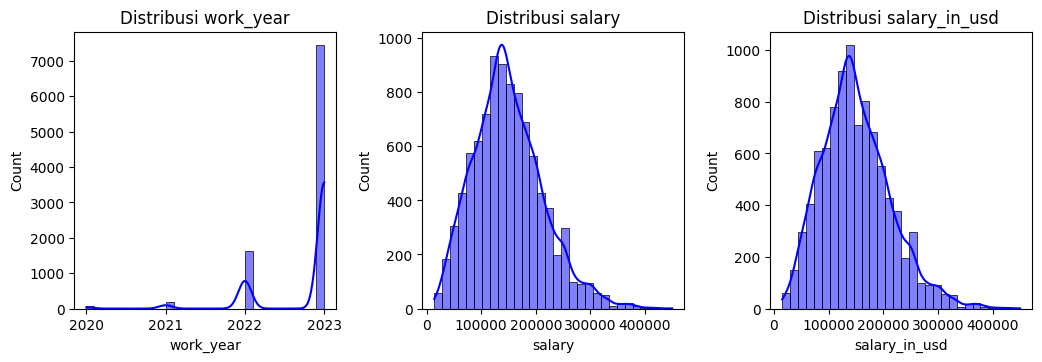

In [6]:
# Menentukan kolom dengan kategori (numerik)
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()


Diagram pertama menunjukkan distribusi tahun kerja (work_year). Terlihat bahwa sebagian besar data terkonsentrasi di tahun 2023, dengan lonjakan yang sangat tinggi. Hal ini menunjukkan bahwa dataset mungkin sangat didominasi oleh data dari tahun 2023, atau ada anomali dalam data yang perlu diselidiki. Distribusi untuk tahun 2020, 2021, dan 2022 sangat rendah, hampir tidak terlihat. Hal ini bisa mengindikasikan bahwa data dari tahun-tahun tersebut sangat sedikit atau tidak relevan dalam konteks dataset ini.

Diagram kedua dan ketiga menunjukkan distribusi gaji (salary) dan gaji dalam dolar AS (salary_in_usd). Kedua distribusi ini terlihat sangat mirip, yang mengindikasikan bahwa konversi gaji ke USD dilakukan dengan konsisten. Distribusi kedua gaji menunjukkan kemiringan positif (skewness) yang signifikan, dengan puncak di sekitar 100,000 dan ekor yang panjang ke kanan, menunjukkan adanya beberapa gaji yang sangat tinggi. Distribusi ini tidak mengikuti distribusi normal, yang perlu dipertimbangkan dalam analisis lebih lanjut.

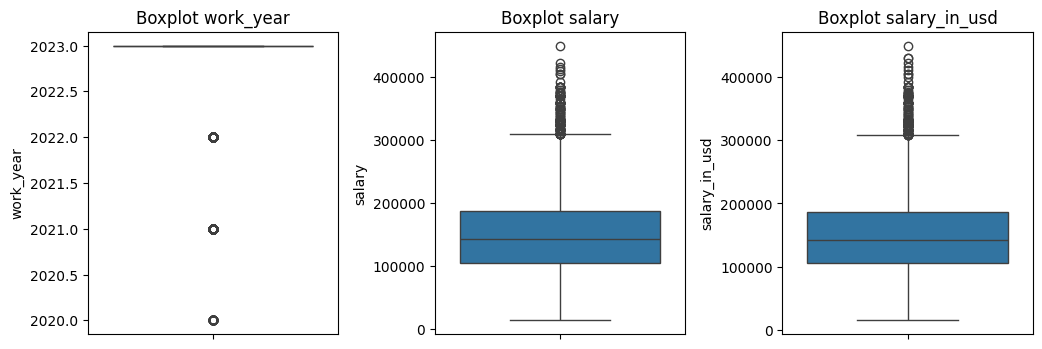

In [7]:
# Membuat visualisasi boxplot
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

Boxplot pertama menunjukkan distribusi tahun kerja (work_year). Terlihat bahwa sebagian besar data terkonsentrasi di tahun 2023, yang ditunjukkan oleh garis tebal di bagian atas boxplot. Ini mengindikasikan bahwa dataset mungkin sangat didominasi oleh data dari tahun 2023. Selain itu, terdapat beberapa outlier di tahun 2020, 2021, dan 2022. Hal ini menunjukkan bahwa ada beberapa data dari tahun-tahun tersebut yang berada di luar rentang tipikal data tahun kerja.

Boxplot kedua dan ketiga menunjukkan distribusi gaji (salary) dan gaji dalam dolar AS (salary_in_usd). Kedua boxplot ini terlihat sangat mirip, yang mengindikasikan bahwa konversi gaji ke USD dilakukan dengan konsisten. Distribusi gaji menunjukkan adanya banyak outlier di bagian atas, yang mengindikasikan adanya gaji yang sangat tinggi di luar rentang tipikal. Selain itu, kedua boxplot menunjukkan distribusi yang miring ke kanan (positively skewed), yang ditunjukkan oleh garis median yang lebih dekat ke bagian bawah kotak. Hal ini mengindikasikan bahwa sebagian besar gaji berada di rentang yang lebih rendah, dengan beberapa gaji yang sangat tinggi menarik distribusi ke arah kanan.

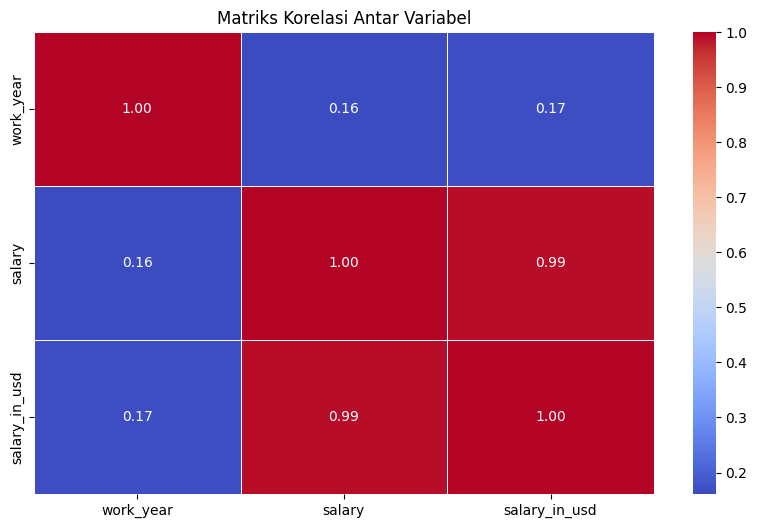

In [8]:
# Heatmap korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(num_features.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

Diagram ini menampilkan matriks korelasi antara tiga variabel numerik: work_year, salary, dan salary_in_usd. Korelasi diukur dalam rentang -1 hingga 1, di mana 1 menunjukkan korelasi positif sempurna, -1 menunjukkan korelasi negatif sempurna, dan 0 menunjukkan tidak ada korelasi. Dari diagram, terlihat bahwa salary dan salary_in_usd memiliki korelasi positif yang sangat kuat (0.99 dan 1.00), yang mengindikasikan bahwa kedua variabel ini bergerak searah dan sangat terkait. Hal ini wajar karena salary_in_usd adalah konversi dari salary ke dalam dolar AS. Sementara itu, work_year memiliki korelasi positif yang lemah dengan salary (0.16) dan salary_in_usd (0.17). Ini menunjukkan bahwa ada sedikit hubungan antara tahun kerja dengan gaji, tetapi hubungannya tidak sekuat antara salary dan salary_in_usd.

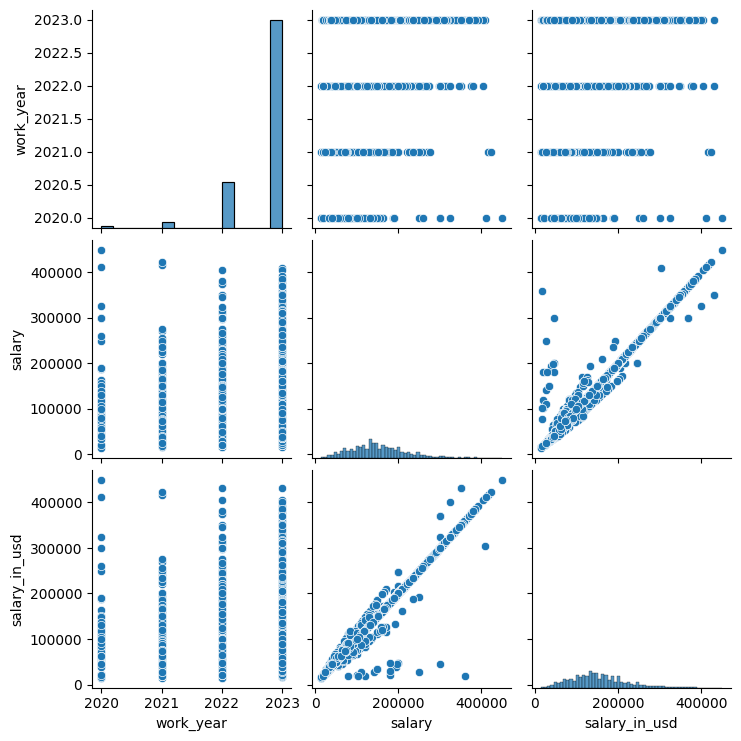

In [9]:
# Menentukan fitur numerik dalam dataset
num_features = df.select_dtypes(include=['number'])  # Ubah menjadi DataFrame
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

Grafik yang ditampilkan adalah pasangan plot (pairplot) yang menggambarkan hubungan antara variabel-variabel numerik dalam dataset, termasuk work_year, salary, dan salary_in_usd. Dari histogram di diagonal, terlihat bahwa distribusi tahun kerja (work_year) menunjukkan peningkatan jumlah data yang signifikan pada tahun 2023, menunjukkan bahwa sebagian besar entri dalam dataset berasal dari tahun tersebut. Distribusi salary dan salary_in_usd cenderung miring ke kanan (right-skewed), yang mengindikasikan bahwa sebagian besar gaji berada dalam rentang yang lebih rendah, sementara terdapat beberapa nilai ekstrem yang menunjukkan gaji sangat tinggi.

Dari scatter plot antar-variabel, terlihat bahwa salary dan salary_in_usd memiliki hubungan linier yang sangat kuat, dengan sebagian besar titik data mengikuti garis diagonal. Hal ini menunjukkan bahwa nilai gaji dalam dataset dikonversi dari mata uang lokal ke USD tanpa perubahan signifikan dalam distribusi, yang membuat kedua variabel ini sangat berkorelasi. Sementara itu, hubungan antara work_year dan salary tampaknya tidak menunjukkan pola yang jelas, kecuali adanya tren peningkatan jumlah data di tahun 2023. Ini mengindikasikan bahwa dataset lebih banyak merepresentasikan data terbaru, tetapi tidak serta merta menunjukkan bahwa gaji meningkat secara signifikan berdasarkan tahun.

## d. Visualisasi Data

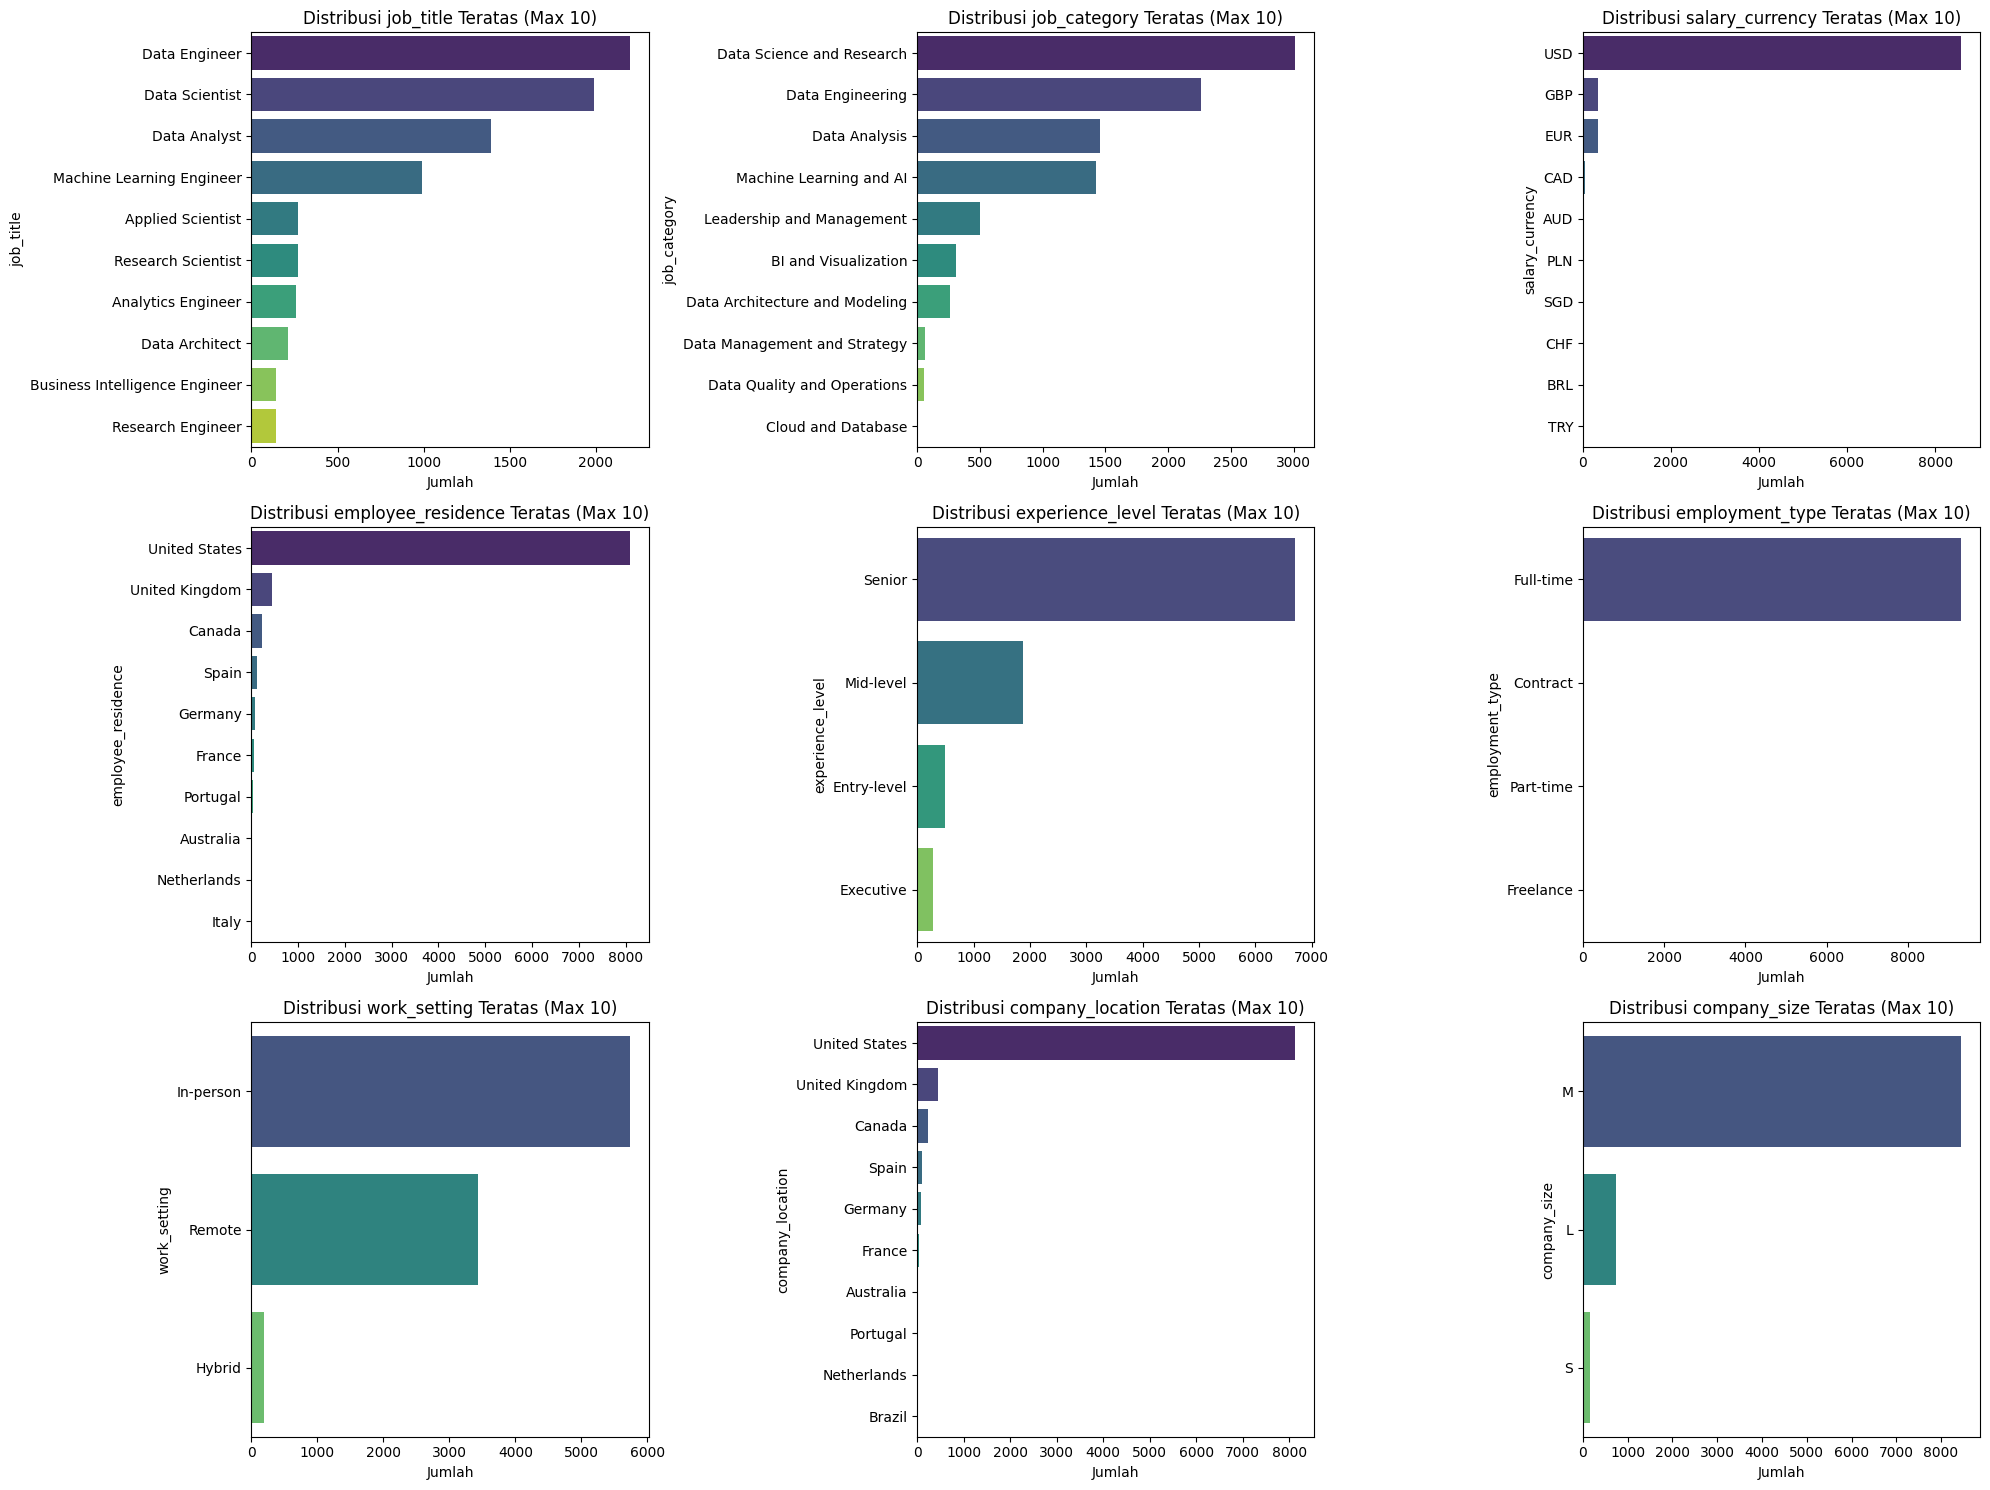

In [10]:
# Menentukan kolom dengan kategori object (kategorikal)
object_cols = df.select_dtypes(include=['object']).columns

# Menentukan jumlah baris dan kolom dalam grid subplot
num_cols = len(object_cols)
cols_per_row = 3  # Maksimum 3 plot per baris
num_rows = math.ceil(num_cols / cols_per_row)  # Hitung jumlah baris yang dibutuhkan

# Membuat figure dan axes untuk subplot
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Flatten agar mudah diiterasi

# Looping untuk membuat countplot pada subplot yang berbeda
for i, col in enumerate(object_cols):
    top_10 = df[col].value_counts().nlargest(10).index
    sns.countplot(y=col, data=df[df[col].isin(top_10)], palette='viridis', order=top_10, ax=axes[i])
    axes[i].set_title(f'Distribusi {col} Teratas (Max 10)')
    axes[i].set_xlabel('Jumlah')
    axes[i].set_ylabel(col)

# Hapus subplot kosong jika jumlah kolom tidak habis dibagi jumlah baris
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Menghapus axis kosong agar tidak tampil

plt.tight_layout()
plt.show()

Analisis Distribusi Data
Berdasarkan visualisasi, kita dapat mengidentifikasi beberapa pola utama dalam dataset yang berkaitan dengan pekerjaan di bidang data.

**1. Job Title dan Job Category**

Dari visualisasi, terlihat bahwa pekerjaan yang paling umum dalam dataset adalah Data Engineer, Data Scientist, dan Data Analyst. Selain itu, kategori pekerjaan yang dominan adalah Data Science and Research, Data Engineering, dan Data Analysis. Hal ini menunjukkan bahwa dataset didominasi oleh peran yang berfokus pada pengolahan data, analisis, dan pengembangan model.

**2. Salary Currency**

Sebagian besar gaji dalam dataset dihitung dalam USD, dengan beberapa dalam GBP, EUR, dan CAD. Hal ini mengindikasikan bahwa data lebih banyak berasal dari negara-negara dengan mata uang utama tersebut. Perbedaan mata uang dapat menjadi kendala dalam clustering jika variabel salary digunakan tanpa normalisasi atau konversi ke satuan yang sama.

**3. Employee Residence dan Company Location**

Distribusi lokasi menunjukkan bahwa mayoritas karyawan tinggal di Amerika Serikat, Inggris, dan beberapa negara Eropa seperti Kanada, Spanyol, dan Jerman. Perusahaan juga sebagian besar berbasis di Amerika Serikat, yang menunjukkan dominasi negara tersebut dalam pasar kerja data dan AI.

**4. Experience Level dan Employment Type**

Sebagian besar individu dalam dataset memiliki level pengalaman Senior, dengan lebih sedikit yang berada di level Mid-level, Entry-level, atau Executive. Ini berarti dataset cenderung lebih mencerminkan pengalaman kerja yang lebih tinggi dibandingkan dengan tenaga kerja pemula. Selain itu, sebagian besar karyawan bekerja dalam sistem Full-time, dengan sedikit yang bekerja secara kontrak atau paruh waktu.

**5. Work Setting**

Mayoritas pekerja dalam dataset bekerja In-person, diikuti oleh Remote dan sedikit dalam sistem Hybrid. Tren ini menunjukkan bahwa meskipun kerja jarak jauh semakin umum, pekerjaan langsung masih lebih dominan.

**6. Company Size**

Ukuran perusahaan dalam dataset lebih banyak bertipe M (Medium), dengan sedikit perusahaan berskala L (Large) dan S (Small). Ini menunjukkan bahwa perusahaan menengah lebih banyak mempekerjakan tenaga kerja dibandingkan perusahaan kecil atau besar.

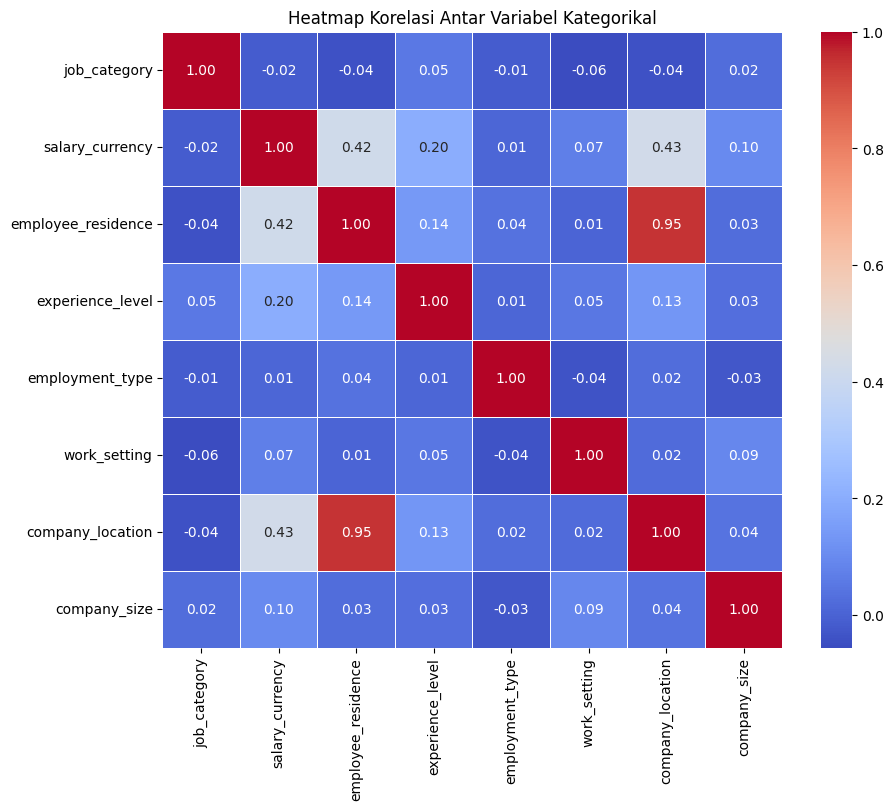

In [11]:
# Membuat salinan dataset untuk encoding
df_encoded_visualization = df.copy()

# Melakukan label encoding pada kolom kategorikal
categorical_cols = ['job_category', 'salary_currency', 'employee_residence', 'experience_level', 
                    'employment_type', 'work_setting', 'company_location', 'company_size']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded_visualization[col] = le.fit_transform(df_encoded_visualization[col])
    label_encoders[col] = le

# Menghitung matriks korelasi
corr_matrix = df_encoded_visualization[categorical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Kategorikal")
plt.show()

Heatmap ini menunjukkan korelasi antar variabel kategorikal setelah dilakukan label encoding. Dari hasil ini, terlihat bahwa ada korelasi yang cukup tinggi antara employee_residence dan company_location (~0.95), yang bisa mengindikasikan bahwa lokasi perusahaan sering kali berkaitan dengan tempat tinggal karyawan. Selain itu, ada korelasi yang moderat antara salary_currency dan company_location (~0.43), yang mungkin mencerminkan hubungan antara lokasi perusahaan dan mata uang yang digunakan dalam pembayaran gaji.

Sebagian besar variabel lainnya memiliki korelasi yang sangat rendah satu sama lain, yang menunjukkan bahwa **tidak ada hubungan linier yang kuat antar kategori.**

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## a. Pemilihan Fitur

Fitur yang Bisa Digunakan dalam Clustering

- **Experience Level:** Kategori ini dapat menjadi faktor utama dalam menentukan kelompok tenaga kerja berdasarkan pengalaman mereka.
- **Work Setting:** Ini dapat membantu dalam mengelompokkan pekerja berdasarkan preferensi kerja mereka (In-person, Remote, Hybrid).
- **Company Size:** Bisa menjadi faktor penting dalam clustering untuk memahami apakah seseorang lebih cenderung bekerja di perusahaan besar, menengah, atau kecil.
- **Job Category:** Fitur ini lebih baik digunakan daripada Job Title karena kategori pekerjaan lebih terstruktur dan dapat mengelompokkan jenis pekerjaan dengan lebih jelas. Sementara Job Title memiliki banyak variasi yang bisa tumpang tindih dan menyebabkan sparsity dalam data, Job Category memberikan klasifikasi yang lebih umum, seperti Data Science and Research, Software Engineering, atau Product Management, sehingga lebih bermanfaat dalam clustering.
- **Salary in USD:** Karena gaji dikonversi ke satu mata uang standar (USD), maka ini bisa menjadi fitur yang kuat untuk mengelompokkan pekerja berdasarkan rentang gaji.

Fitur yang Bisa Dihapus atau Tidak Digunakan

- **Work Year:** Distribusinya hanya dari 2020 sampai 2023 dan dominan di 2023. Data yang sangat didominasi oleh tahun 2023 menciptakan ketidakseimbangan yang signifikan. Algoritma clustering mungkin akan cenderung mengelompokkan data berdasarkan tahun, bukan berdasarkan pola lain yang lebih relevan.
- **Job Title:** Meskipun menarik untuk analisis eksplorasi, judul pekerjaan ini cenderung tumpang tindih dan bisa menyebabkan bias dalam clustering.
- **Salary Currency:** Tidak relevan untuk clustering karena nilai gaji yang sebenarnya lebih penting dibandingkan dengan mata uangnya.
- **Salary:** Jika menggunakan data ini, maka masih harus dikonversi ke USD agar sama rata, dan hasil konversi ini sudah tersedia pada Salary in USD
- **Employee Residence dan Company Location:** Lokasi bisa sangat spesifik dan tidak selalu relevan dalam membentuk cluster berbasis karakteristik pekerjaan. Belum lagi data ini didominasi oleh pekerja dan perusahaan dari Amerika Serikat.
- **Employment Type:** Hampir semua pekerja dalam dataset adalah Full-time, sehingga fitur ini memiliki variasi yang rendah dan tidak akan memberikan banyak informasi dalam clustering.

In [12]:
# Menghapus fitur yang tidak diperlukan
df.drop(['work_year', 'salary_currency','salary', 'job_title', 'employee_residence', 'company_location', 'employment_type'], axis=1, inplace=True)

## b. Menghapus Data Kosong (Missing Values)

In [13]:
# 1. Mengahpus Missing Values berdasarkan hasil EDA sebelumnya (jika ada)
df = df.dropna()
print(df.isnull().sum())
print(f"Jumlah data setelah dihapus: {df.shape}")

job_category        0
salary_in_usd       0
experience_level    0
work_setting        0
company_size        0
dtype: int64
Jumlah data setelah dihapus: (9355, 5)


In [14]:
object_cols = df.select_dtypes(include=['object']).columns
# Ubah tipe data object menjadi category
for col in object_cols:
    df[col] = df[col].astype('category')
print(df.dtypes)

job_category        category
salary_in_usd          int64
experience_level    category
work_setting        category
company_size        category
dtype: object


## c. Menghapus Data Duplikat

In [15]:
print("Jumlah data duplikat: ", df.duplicated().sum())
print(f"Jumlah data sebelum duplikat dihapus: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Jumlah data setelah duplikat dihapus: {df.shape}")

Jumlah data duplikat:  4973
Jumlah data sebelum duplikat dihapus: (9355, 5)
Jumlah data setelah duplikat dihapus: (4382, 5)


## d. Penanganan Outliers

In [16]:
# Menentukan fitur numerik dalam dataset
num_features = df.select_dtypes(include=['number']).columns

# Menghitung Q1, Q3, dan IQR untuk fitur numerik
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk Winsorizing
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Melakukan Winsorizing untuk setiap fitur numerik
for feature in num_features:
    df[feature] = df[feature].clip(lower=lower_bound[feature], upper=upper_bound[feature])

IQR Winsorizing digunakan untuk mengatasi masalah outlier dalam data numerik dengan membatasi nilai-nilai ekstrem pada batas yang ditentukan berdasarkan rentang interkuartil (IQR). Metode ini lebih kuat terhadap outlier dibandingkan dengan metode penghapusan outlier langsung, karena tidak menghilangkan data, melainkan hanya membatasi nilai-nilai ekstrem pada batas yang lebih wajar, sehingga mempertahankan sebagian besar informasi dalam data sambil mengurangi dampak outlier.

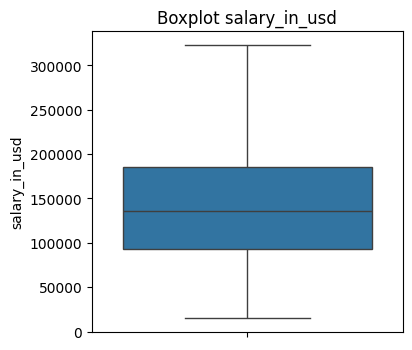

In [17]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

Boxplot gaji sudah tidak memiliki outlier yang signifikan.

## e. Normalisasi Data

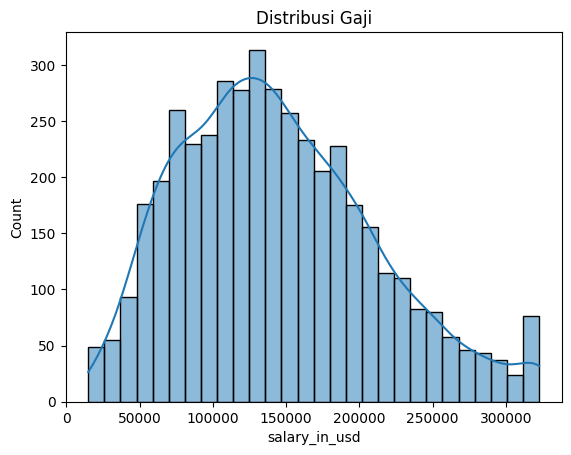

In [18]:
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Distribusi Gaji')
plt.show()

Distribusi gaji dalam histogram menunjukkan bahwa data tidak terdistribusi normal, dengan kemiringan positif dan adanya outlier. Dalam situasi seperti ini, MinMax Scaler lebih cocok daripada StandardScaler. MinMax Scaler menskalakan data ke dalam rentang tetap (0 hingga 1), yang mempertahankan bentuk distribusi asli dan mengurangi dampak outlier. Sebaliknya, StandardScaler mencoba mengubah data menjadi distribusi normal standar, yang dapat mendistorsi data dengan outlier yang signifikan.

In [19]:
# Normalisasi data
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])


## f. Encoding Data

- Label Encoding digunakan untuk kolom ordinal karena mempertahankan informasi urutan.
- One-Hot Encoding digunakan untuk kolom nominal karena tidak ada urutan yang bermakna, dan untuk mencegah model menginterpretasikan urutan yang salah.
- Penyimpanan label_encoders memungkinkan transformasi balik dari nilai numerik ke kategori asli jika diperlukan.

In [20]:
# Copy original dataframe
df_encoded = df.copy()

# Apply Label Encoding to ordinal categorical columns
ordinal_features = ['experience_level', 'company_size']
label_encoders = {}

for col in ordinal_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoder for inverse transformation

# Apply One-Hot Encoding to nominal categorical columns
nominal_features = ['job_category', 'work_setting']
df_encoded = pd.get_dummies(df_encoded, columns=nominal_features)

# Display the transformed dataframe
df_encoded.head()

,salary_in_usd,experience_level,company_size,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,job_category_Data Management and Strategy,job_category_Data Quality and Operations,job_category_Data Science and Research,job_category_Leadership and Management,job_category_Machine Learning and AI,work_setting_Hybrid,work_setting_In-person,work_setting_Remote
0,0.260106,2,0,False,False,False,False,True,False,False,False,False,False,True,False,False
1,0.555894,3,1,False,False,False,True,False,False,False,False,False,False,False,True,False
2,0.217156,3,1,False,False,False,True,False,False,False,False,False,False,False,True,False
3,0.640416,3,1,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.254541,3,1,False,False,False,False,False,False,False,True,False,False,False,True,False


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [21]:
# ubah df ke array
X = df_encoded.values

In [22]:
# Mencoba membandingkan K-Means vs DBSCAN
# K-Means
kmeans_model = KMeans(n_clusters=3, random_state=5, n_init='auto')
labels_kmeans = kmeans_model.fit_predict(X)
silhouette_kmeans = silhouette_score(X, labels_kmeans)
print(f'Silhouette Score (KMeans, 3 clusters): {silhouette_kmeans:.2f}')

# DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan_model.fit_predict(X)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
if n_clusters > 1:
    silhouette_dbscan = silhouette_score(X, labels_dbscan)
    print(f'Silhouette Score (DBSCAN): {silhouette_dbscan:.2f}')
else:
    print("DBSCAN hanya menemukan 1 cluster atau seluruh data dianggap outlier.")

Silhouette Score (KMeans, 3 clusters): 0.29
Silhouette Score (DBSCAN): 0.75


Berdasarkan hasil silhouette score, bisa dilihat perbandingan k-means (0.29) vs DBSCAN (0.75)

DBSCAN jauh lebih baik dibandingkan K-Means untuk clustering kasus ini karena beberapa alasan utama yang berkaitan dengan sifat data yang digunakan:

1. Data pekerjaan seringkali memiliki distribusi yang tidak berbentuk bola (non-spherical), dengan variasi yang kompleks berdasarkan faktor seperti pengalaman dan gaji. K-Means mengasumsikan bahwa cluster berbentuk bulat (karena berbasis centroid dan jarak Euclidean), sehingga kurang fleksibel dalam menangani bentuk cluster yang tidak beraturan. DBSCAN, di sisi lain, mampu menangkap cluster dengan bentuk arbitrer dan tidak terbatas pada distribusi tertentu.

2. DBSCAN dapat mengidentifikasi outlier secara otomatis. Dalam data pekerjaan, sering ada individu dengan gaji ekstrem, misalnya eksekutif dengan gaji jauh lebih tinggi dari rata-rata. K-Means akan tetap memasukkan outlier ke dalam salah satu cluster, yang dapat mengganggu hasil clustering. DBSCAN mengenali outlier secara alami dan memberi label sebagai -1 (noise), sehingga tidak mengganggu pemetaan cluster utama.

3. K-Means Sensitif terhadap Skala dan Variasi Gaji. K-Means menggunakan jarak Euclidean, yang membuatnya sensitif terhadap skala data seperti gaji yang memiliki rentang luas (misalnya, dari $20,000 hingga $300,000+ per tahun). DBSCAN tidak memerlukan normalisasi gaji secara ketat karena lebih mengandalkan kepadatan data daripada jarak absolut.

4. K-Means membutuhkan jumlah cluster (k) yang harus ditentukan terlebih dahulu, yang sulit dilakukan tanpa eksplorasi data yang mendalam. DBSCAN secara otomatis menemukan jumlah cluster berdasarkan kepadatan data, sehingga lebih cocok untuk data pekerjaan yang sering kali memiliki jumlah cluster yang tidak diketahui.

Maka dari itu, **model yang digunakan untuk Clustering adalah DBSCAN.**

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [23]:
# Mencari parameter min_samples yang optimal dengan min_samples = features * 2
def calculate_min_samples(df):
    num_features = df_encoded.shape[1]
    min_samples = num_features * 2
    return min_samples

min_samples_value = calculate_min_samples(df)
print(f"Recommended min_samples: {min_samples_value}")

Recommended min_samples: 32


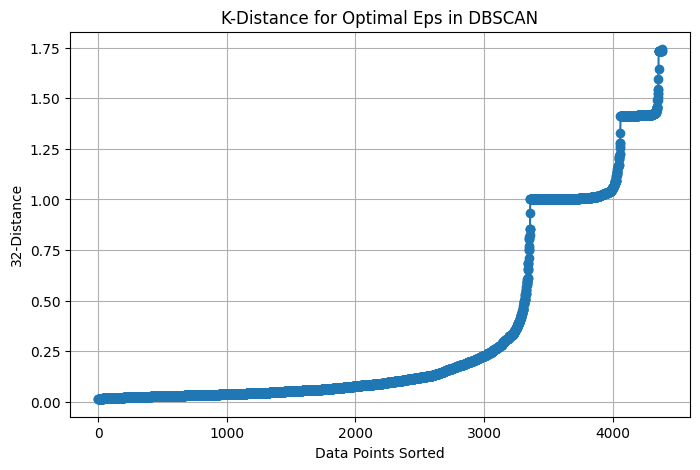

In [24]:
# Menentukan jumlah tetangga
k = 32

# Mencari k-distance
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)

# Mengambil jarak ke tetangga ke-k untuk setiap titik
k_distances = np.sort(distances[:, k - 1])  # Urutkan untuk visualisasi

# Plot elbow method untuk menentukan eps optimal
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(k_distances) + 1), k_distances, marker='o', linestyle='-')
plt.xlabel("Data Points Sorted")
plt.ylabel(f"{k}-Distance")
plt.title("K-Distance for Optimal Eps in DBSCAN")
plt.grid()
plt.show()

Grafik ini menunjukkan plot k-distance untuk menentukan nilai epsilon (eps) optimal dalam algoritma DBSCAN, di mana sumbu x merepresentasikan titik data yang diurutkan berdasarkan jarak ke tetangga ke-32 (32-distance), dan sumbu y merepresentasikan nilai jarak tersebut. Dari grafik, terlihat adanya kenaikan tajam pada jarak di sekitar titik data ke-3000, yang mengindikasikan bahwa nilai eps optimal sebaiknya dipilih di sekitar titik ini untuk mengidentifikasi cluster dengan kepadatan yang signifikan, sambil memisahkan noise dari data cluster.

eps: 0.1, Silhouette Score: 0.3331
eps: 0.2, Silhouette Score: 0.4638
eps: 0.3, Silhouette Score: 0.4995
eps: 0.4, Silhouette Score: 0.5020
eps: 0.5, Silhouette Score: 0.5128
eps: 0.6, Silhouette Score: 0.5128
eps: 0.7, Silhouette Score: 0.5128
eps: 0.8, Silhouette Score: 0.5128
eps: 0.9, Silhouette Score: 0.5128
eps: 1.0, Silhouette Score: 0.4068
eps: 1.1, Silhouette Score: 0.3962
eps: 1.2, Silhouette Score: 0.3962
eps: 1.3, Silhouette Score: 0.3962
eps: 1.4, Silhouette Score: 0.3962


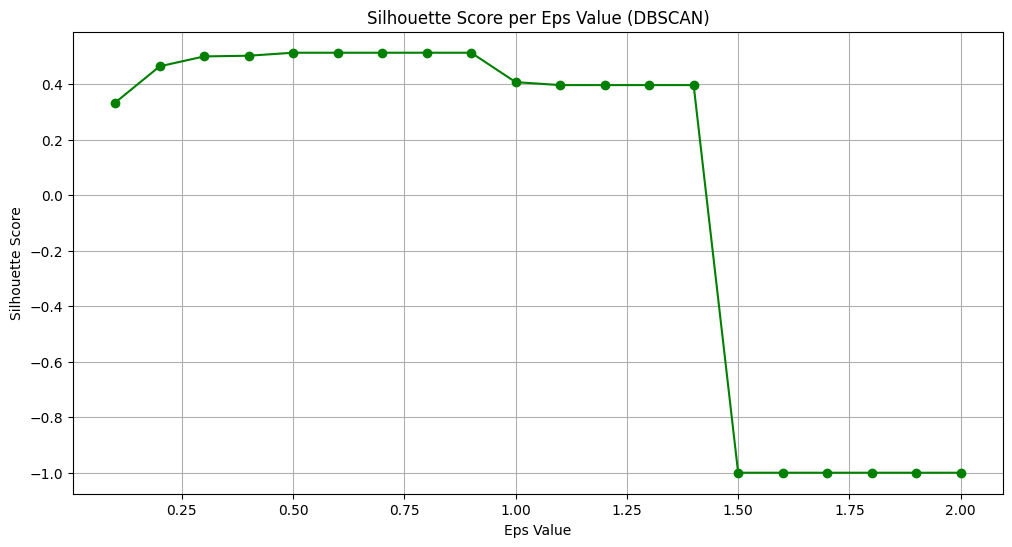

In [25]:
eps_values = np.arange(0.1, 2.1, 0.1)  # Rentang nilai eps yang akan diuji
silhouette_scores = []

for eps in eps_values:
    dbscan_model = DBSCAN(eps=eps, min_samples=32)
    labels = dbscan_model.fit_predict(X)
    
    # Pastikan ada lebih dari 1 cluster (tanpa memperhitungkan noise -1)
    if len(set(labels)) > 1:
        sil_score = silhouette_score(X, labels, metric='euclidean')
        silhouette_scores.append(sil_score)
        print(f'eps: {eps:.1f}, Silhouette Score: {sil_score:.4f}')
    else:
        silhouette_scores.append(-1)  # Jika hanya ada 1 cluster, silhouette tidak dihitung

# Plot hasil evaluasi
plt.figure(figsize=(12, 6))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title('Silhouette Score per Eps Value (DBSCAN)')
plt.xlabel('Eps Value')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Grafik ini menunjukkan perubahan silhouette score terhadap nilai epsilon (eps) dalam algoritma DBSCAN. Silhouette score mencapai nilai tertinggi sekitar 0.51 pada eps 0.5 hingga 0.9, mengindikasikan bahwa pada rentang eps tersebut cluster yang dihasilkan memiliki kohesi dan separasi yang baik. Namun, setelah eps 1.0, silhouette score menurun drastis hingga mencapai -1, menunjukkan bahwa cluster yang dihasilkan menjadi buruk, dengan titik-titik data yang kemungkinan besar salah dikelompokkan atau didominasi oleh noise. **Kesimpulan ini mengarahkan pada pemilihan nilai eps di sekitar 0.5 hingga 0.9 untuk hasil clusterisasi yang optimal.**

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

PCA 0.95 (n_components=8) - Silhouette Score: 0.6258
PCA 0.9 (n_components=6) - Silhouette Score: 0.6692
PCA 0.85 (n_components=5) - Silhouette Score: 0.8027
PCA 0.8 (n_components=4) - Silhouette Score: 0.7813
PCA 0.75 (n_components=3) - Silhouette Score: 0.7708
PCA 0.7 (n_components=3) - Silhouette Score: 0.7708
PCA 0.65 (n_components=2) - Silhouette Score: 0.9271
PCA 0.6 (n_components=2) - Silhouette Score: 0.9271


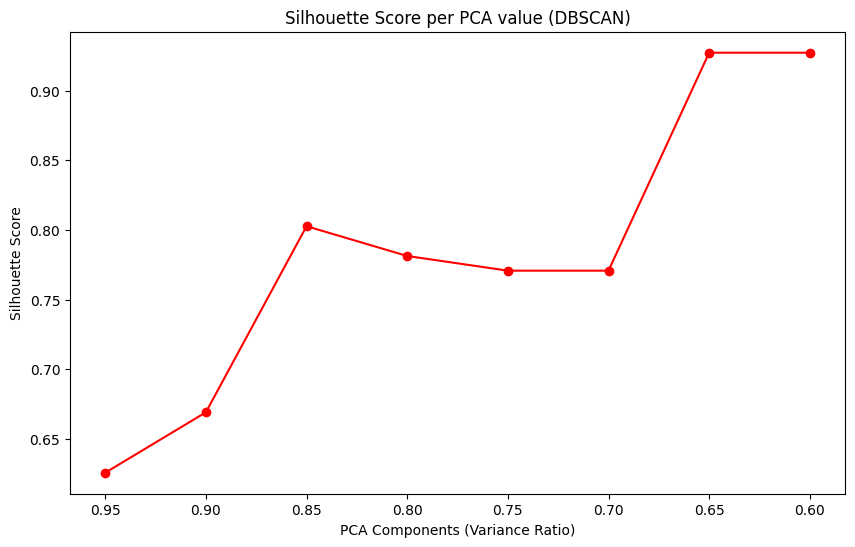

In [26]:
# Rentang variansi untuk diuji
pca_values = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6]
scores = []
best_pca = None
best_score = -1

for pca_value in pca_values:
    # Fit PCA untuk menentukan jumlah komponen
    pca = PCA(n_components=pca_value, svd_solver='full', random_state=95)  
    pca.fit(X)
    
    # Menentukan jumlah komponen berdasarkan variansi yang dijelaskan
    n_components = np.sum(np.cumsum(pca.explained_variance_ratio_) <= pca_value)
    
    # Menerapkan PCA dengan jumlah komponen yang telah ditentukan
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(X)

    # Clustering menggunakan DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=32)
    labels = dbscan.fit_predict(pca_data)

    # Validasi: Memastikan lebih dari 1 cluster ditemukan sebelum menghitung Silhouette Score
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        score = silhouette_score(pca_data, labels)
        scores.append(score)
        print(f'PCA {pca_value} (n_components={n_components}) - Silhouette Score: {score:.4f}')
        
        # Simpan hasil terbaik
        if score > best_score:
            best_score = score
            best_pca = pca_value
    else:
        scores.append(None)
        print(f'PCA {pca_value} menghasilkan kurang dari 2 cluster yang valid.')

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(pca_values, scores, marker='o', linestyle='-', color='red')
plt.title('Silhouette Score per PCA value (DBSCAN)')
plt.xlabel('PCA Components (Variance Ratio)')
plt.ylabel('Silhouette Score')
plt.gca().invert_xaxis()  # Agar variansi yang lebih tinggi ditampilkan di kiri
plt.show()


Grafik ini menunjukkan perubahan silhouette score terhadap berbagai jumlah komponen PCA (Principal Component Analysis) yang digunakan dalam algoritma DBSCAN. Silhouette score meningkat secara signifikan ketika jumlah komponen PCA dikurangi, mencapai **nilai tertinggi sekitar 0.9271 pada 2 komponen PCA (variance ratio 0.65 dan 0.6)**. Ini mengindikasikan bahwa dengan mengurangi dimensi data menjadi 2 komponen, cluster yang dihasilkan oleh DBSCAN memiliki kohesi dan separasi yang jauh lebih baik dibandingkan dengan menggunakan lebih banyak komponen PCA. Oleh karena itu, 2 komponen PCA adalah pilihan optimal untuk clusterisasi DBSCAN pada dataset ini.

In [27]:
# Menerapkan PCA dengan jumlah komponen optimal yang telah ditemukan sebelumnya
# Menentukan jumlah komponen berdasarkan nilai varians yang sama dengan sebelumnya
pca_temp = PCA(n_components=2, svd_solver='full', random_state=95)
pca_temp.fit(X)
n_components = np.sum(np.cumsum(pca_temp.explained_variance_ratio_) <= 0.65)

# Menerapkan PCA dengan jumlah komponen yang ditentukan
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(X)

# Clustering menggunakan DBSCAN dengan parameter yang sesuai
dbscan_model = DBSCAN(eps=0.5, min_samples=32)
labels = dbscan_model.fit_predict(pca_data)

# Memastikan ada lebih dari satu cluster sebelum menghitung Silhouette Score
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
if n_clusters > 1:
    score = silhouette_score(pca_data, labels)
    print(f'Silhouette Score (DBSCAN, PCA={0.65}, n_components={n_components}): {score:.4f}')
else:
    print("DBSCAN hanya menemukan satu cluster atau semua dianggap sebagai noise.")

Silhouette Score (DBSCAN, PCA=0.65, n_components=2): 0.9271


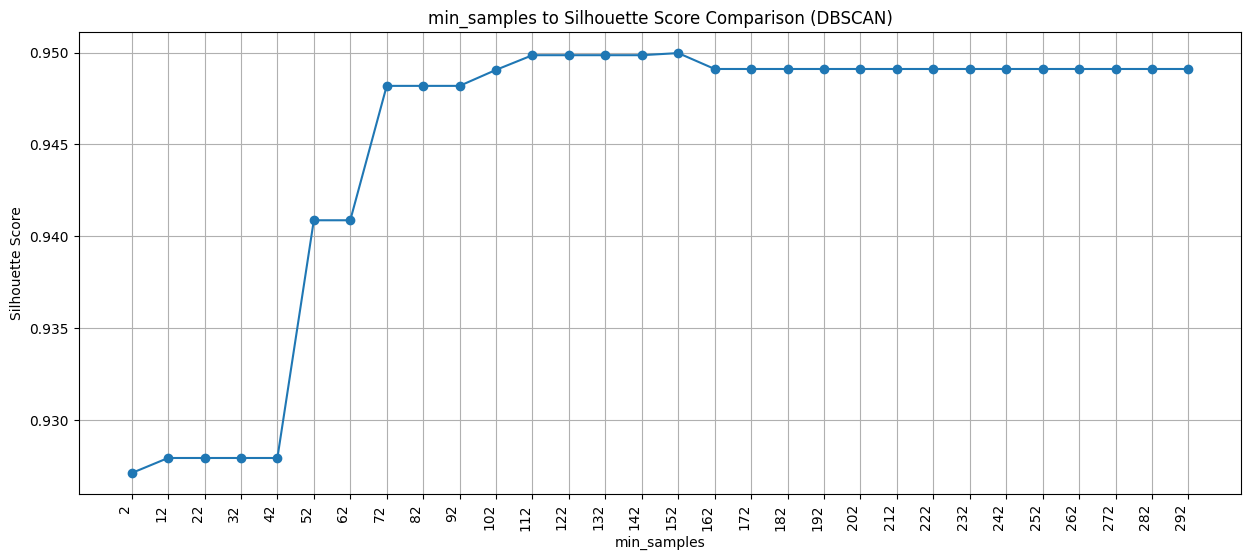

min_samples optimal: 152
Silhouette Score tertinggi: 0.9500


In [28]:
# Mencari min_samples optimal untuk DBSCAN berdasarkan silhouette score.
def find_optimal_min_samples(X_pca, min_samples_range):
    silhouette_scores = []
    best_score = -1
    best_min_samples = None

    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            non_noise_points = labels != -1
            if np.sum(non_noise_points) > n_clusters:
                score = silhouette_score(X_pca[non_noise_points], labels[non_noise_points])
                silhouette_scores.append(score)
                if score > best_score:
                    best_score = score
                    best_min_samples = min_samples
            else:
                silhouette_scores.append(None)  # Tidak cukup data non-noise
        else:
            silhouette_scores.append(None)  # Kurang dari 2 cluster

    return best_min_samples, best_score, silhouette_scores

# Inisialisasi PCA dengan 2 komponen utama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Rentang nilai min_samples yang akan diuji
min_samples_range = range(2, 300, 10)

# Cari min_samples optimal
best_min_samples, best_score, silhouette_scores = find_optimal_min_samples(X_pca, min_samples_range)

# Visualisasi hasil
plt.figure(figsize=(15, 6))
plt.plot(min_samples_range, silhouette_scores, marker='o')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.title('min_samples to Silhouette Score Comparison (DBSCAN)')
plt.xticks(min_samples_range, rotation=90, ha='right')
plt.grid(True)
plt.show()

print(f"min_samples optimal: {best_min_samples}")
print(f"Silhouette Score tertinggi: {best_score:.4f}")

Grafik ini membandingkan nilai min_samples dengan silhouette score dalam algoritma DBSCAN, menunjukkan bahwa **silhouette score tertinggi (0.95) dicapai pada min_samples 152**. Ini mengindikasikan bahwa 152 adalah jumlah poin optimal yang diperlukan untuk membentuk cluster yang padat dan terpisah dengan baik dalam dataset yang digunakan, berdasarkan evaluasi silhouette score.

In [29]:
# Inisialisasi PCA dengan 2 komponen utama
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X)

# Inisialisasi dan melatih model DBSCAN dengan data hasil PCA
dbscan = DBSCAN(eps=0.5, min_samples=152)
labels = dbscan.fit_predict(X_pca)

# Mendapatkan jumlah cluster yang terbentuk (tidak termasuk noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Jumlah cluster yang terbentuk: {n_clusters}")

# Menambahkan hasil cluster ke dalam DataFrame
df['Cluster'] = labels

# Menampilkan silhouette score untuk validasi cluster
if n_clusters > 1:
    # Perhatikan kita perlu mengecualikan noise points (-1) saat menghitung silhouette score
    non_noise_points = labels != -1
    if np.sum(non_noise_points) > n_clusters:  # Memastikan ada cukup points untuk menghitung
        score = silhouette_score(X_pca[non_noise_points], labels[non_noise_points])
        print(f'Silhouette Score: {score:.4f}')
    else:
        print("Tidak cukup data non-noise untuk menghitung Silhouette Score")
else:
    print("Tidak dapat menghitung Silhouette Score: kurang dari 2 cluster yang valid")

def analyze_clusters(X_pca, labels):
    print("Analisis Karakteristik Setiap Cluster berdasarkan PCA:")
    
    # Mendapatkan semua label cluster yang unik (termasuk noise dengan label -1)
    unique_labels = set(labels)
    
    for cluster_id in unique_labels:
        # Mengambil data untuk cluster saat ini
        cluster_data = X_pca[np.where(labels == cluster_id)]
        
        # Jika cluster kosong, lanjutkan ke cluster berikutnya
        if cluster_data.shape[0] == 0:
            print(f"Cluster {cluster_id} tidak memiliki data.")
            continue
        
        # Menghitung rata-rata dari komponen utama
        mean_pc1 = cluster_data[:, 0].mean()  # Rata-rata Principal Component 1
        mean_pc2 = cluster_data[:, 1].mean()  # Rata-rata Principal Component 2
        
        # Menghitung ukuran cluster
        cluster_size = cluster_data.shape[0]
        cluster_percentage = (cluster_size / len(X_pca)) * 100
        
        # Tampilkan hasil analisis
        if cluster_id == -1:
            print(f"\nNoise points (Cluster {cluster_id}):")
        else:
            print(f"\nCluster {cluster_id}:")
        
        print(f"Jumlah data: {cluster_size} ({cluster_percentage:.2f}%)")
        print(f"Rata-rata PC1: {mean_pc1:.4f}")
        print(f"Rata-rata PC2: {mean_pc2:.4f}")

# Analisis karakteristik setiap cluster berdasarkan PCA
analyze_clusters(X_pca, labels)

Jumlah cluster yang terbentuk: 5
Silhouette Score: 0.9500
Analisis Karakteristik Setiap Cluster berdasarkan PCA:

Cluster 0:
Jumlah data: 1521 (34.71%)
Rata-rata PC1: 0.6381
Rata-rata PC2: 0.5804

Cluster 1:
Jumlah data: 1160 (26.47%)
Rata-rata PC1: 0.5408
Rata-rata PC2: -0.8312

Cluster 2:
Jumlah data: 591 (13.49%)
Rata-rata PC1: -0.3659
Rata-rata PC2: 0.6442

Cluster 3:
Jumlah data: 153 (3.49%)
Rata-rata PC1: -2.4607
Rata-rata PC2: -0.6348

Cluster 4:
Jumlah data: 417 (9.52%)
Rata-rata PC1: -0.4649
Rata-rata PC2: -0.7659

Noise points (Cluster -1):
Jumlah data: 540 (12.32%)
Rata-rata PC1: -1.5023
Rata-rata PC2: 0.2170


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

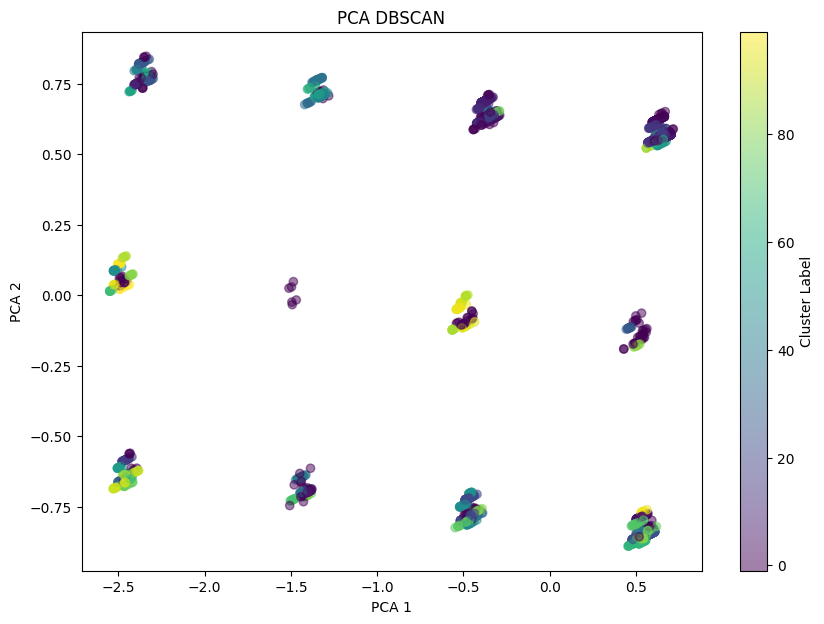

In [30]:
# 2D PCA Projection
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels_dbscan, cmap='viridis', alpha=0.5)
plt.title("PCA DBSCAN")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster Label")
plt.show()

Grafik ini menampilkan hasil clustering DBSCAN setelah dilakukan reduksi dimensi menggunakan PCA (Principal Component Analysis). Data asli direduksi menjadi dua komponen utama (PCA 1 dan PCA 2), yang kemudian digunakan untuk mengelompokkan data. Titik-titik pada grafik diwarnai sesuai dengan label cluster yang dihasilkan oleh DBSCAN.

Dari grafik, dapat dilihat bahwa DBSCAN berhasil mengidentifikasi beberapa cluster dengan kepadatan yang berbeda. Cluster-cluster ini terlihat terpisah dengan baik pada ruang PCA 1 dan PCA 2, menunjukkan bahwa PCA berhasil menangkap variasi penting dalam data yang relevan untuk pengelompokan.

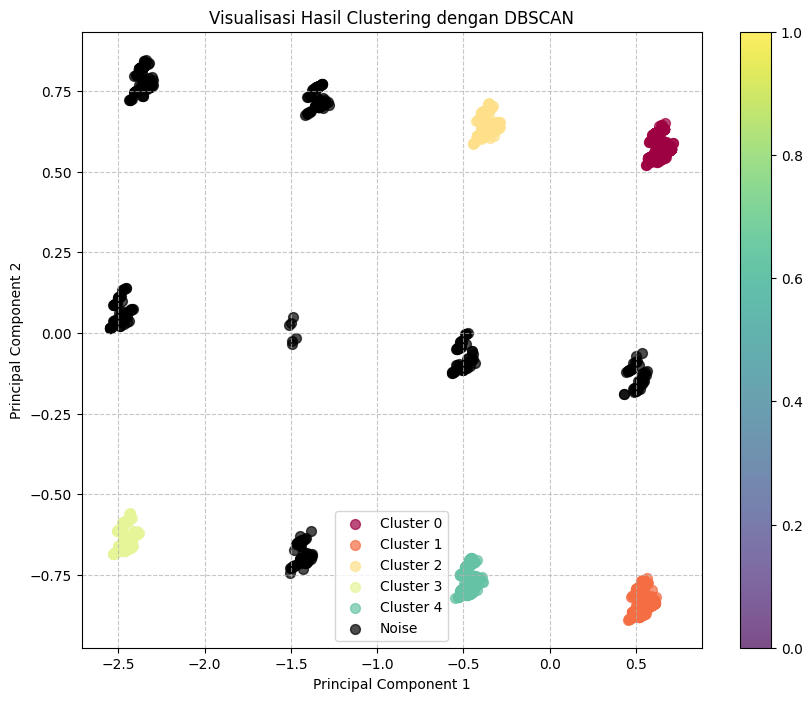

In [31]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))

# Warna untuk setiap cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))

# Plot setiap cluster
for cluster_id, col in zip(set(labels), colors):
    if cluster_id == -1:
        # Noise points warna hitam
        col = 'black'
    
    # Plot points dari cluster saat ini
    cluster_data = X_pca[labels == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, 
                c=[col], marker='o', alpha=0.7,
                label=f'Cluster {cluster_id}' if cluster_id != -1 else 'Noise')

plt.title('Visualisasi Hasil Clustering dengan DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Titik-titik pada grafik diwarnai berdasarkan cluster yang ditetapkan oleh DBSCAN. Warna yang berbeda menunjukkan cluster yang berbeda, dan titik-titik hitam menunjukkan noise, yaitu titik-titik yang tidak cocok dengan cluster mana pun.

Dari grafik, dapat dilihat bahwa DBSCAN berhasil mengidentifikasi beberapa cluster dengan kepadatan yang berbeda. cluster-cluster ini terlihat terpisah dengan baik pada ruang PCA 1 dan PCA 2, menunjukkan bahwa PCA berhasil menangkap variasi penting dalam data yang relevan untuk pengelompokan. Beberapa cluster terlihat lebih padat dan terdefinisi dengan baik, sementara yang lain lebih tersebar. Adanya titik-titik hitam (noise) menunjukkan bahwa DBSCAN mampu mengidentifikasi outlier atau titik-titik yang tidak termasuk dalam pola pengelompokan utama.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [32]:
# Memasukkan hasil cluster ke dataset
df['Cluster'] = labels
df


,job_category,salary_in_usd,experience_level,work_setting,company_size,Cluster
0,Data Engineering,0.260106,Mid-level,Hybrid,L,-1
1,Data Architecture and Modeling,0.555894,Senior,In-person,M,0
2,Data Architecture and Modeling,0.217156,Senior,In-person,M,0
3,Data Science and Research,0.640416,Senior,In-person,M,0
4,Data Science and Research,0.254541,Senior,In-person,M,0
...,...,...,...,...,...,...
9349,Data Engineering,0.043461,Mid-level,Hybrid,L,-1
9350,Data Management and Strategy,0.487626,Senior,Remote,L,1
9351,Data Science and Research,1.000000,Senior,Remote,L,1
9352,Data Science and Research,0.442115,Mid-level,Remote,L,4


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [33]:
df[num_features] = scaler.inverse_transform(df[num_features])
df.head()

,job_category,salary_in_usd,experience_level,work_setting,company_size,Cluster
0,Data Engineering,95012.0,Mid-level,Hybrid,L,-1
1,Data Architecture and Modeling,186000.0,Senior,In-person,M,0
2,Data Architecture and Modeling,81800.0,Senior,In-person,M,0
3,Data Science and Research,212000.0,Senior,In-person,M,0
4,Data Science and Research,93300.0,Senior,In-person,M,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [34]:
df.describe()

,salary_in_usd,Cluster
count,4382.000000,4382.000000
mean,143758.077704,0.896623
std,66566.042560,1.400278
min,15000.000000,-1.000000
25%,93425.000000,0.000000
50%,136050.000000,1.000000
75%,185100.000000,2.000000
max,322612.500000,4.000000


Tabel statistik deskriptif menunjukkan bahwa data dikelompokkan ke dalam beberapa cluster, ditandai dengan kolom "Cluster" yang memiliki nilai dari -1 hingga 4. Nilai -1 merepresentasikan noise atau data yang tidak termasuk dalam cluster mana pun. Rata-rata nilai cluster adalah 0.8966, dengan standar deviasi 1.4003, menunjukkan distribusi cluster yang cukup tersebar. Kuartil menunjukkan bahwa 25% data berada di cluster 0, 50% berada di cluster 1, dan 75% berada di cluster 2. Ini mengindikasikan bahwa cluster 0, 1, dan 2 adalah cluster yang paling umum dalam dataset. 

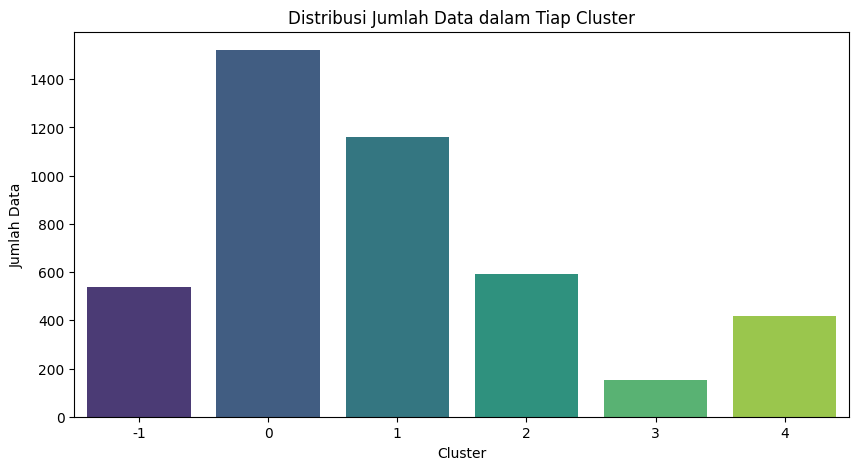

In [35]:
# Hitung jumlah data di tiap cluster
cluster_counts = df["Cluster"].value_counts().sort_index()
clusters = cluster_counts.index

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=clusters, y=cluster_counts, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Jumlah Data dalam Tiap Cluster")
plt.xticks(np.arange(cluster_counts.index.max() + 2))  # Menyesuaikan jumlah cluster
plt.show()

Grafik batang ini menggambarkan distribusi jumlah data dalam setiap cluster yang dihasilkan oleh algoritma klasterisasi, di mana sumbu x menunjukkan label cluster (termasuk -1 yang mewakili noise atau data yang tidak masuk ke cluster mana pun) dan sumbu y menunjukkan jumlah data dalam setiap cluster. Dapat dilihat bahwa cluster 0 memiliki jumlah data tertinggi, diikuti oleh cluster 1, sedangkan cluster 3 memiliki jumlah data terendah. Cluster -1 (noise) juga memiliki jumlah data yang cukup signifikan, menunjukkan adanya sejumlah besar data yang tidak masuk clustering. Perbedaan jumlah data yang signifikan antar cluster ini mengindikasikan distribusi data yang tidak merata di antara cluster-cluster yang terbentuk.

In [36]:
# Ringkasan Karakteristik cluster
print("\n--- Ringkasan Karakteristik cluster ---")

clusters = sorted(df['Cluster'].unique())

for cluster in clusters:
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\ncluster {cluster} ({len(cluster_data)} data):")
    
    # Statistik gaji
    print(f"  Gaji Rata-rata: ${cluster_data['salary_in_usd'].mean():,.0f} (rentang: ${cluster_data['salary_in_usd'].min():,.0f} - ${cluster_data['salary_in_usd'].max():,.0f})")
    
    # Distribusi level pengalaman
    top_experience = cluster_data['experience_level'].value_counts().index[0]
    experience_pct = (cluster_data['experience_level'].value_counts().iloc[0] / len(cluster_data)) * 100
    print(f"  Level Pengalaman Dominan: {top_experience} ({experience_pct:.1f}%)")
    
    # Distribusi work setting
    top_work_setting = cluster_data['work_setting'].value_counts().index[0]
    work_setting_pct = (cluster_data['work_setting'].value_counts().iloc[0] / len(cluster_data)) * 100
    print(f"  Work Setting Umum: {top_work_setting} ({work_setting_pct:.1f}%)")
    
    # Distribusi kategori pekerjaan
    top_job_category = cluster_data['job_category'].value_counts().index[0]
    job_category_pct = (cluster_data['job_category'].value_counts().iloc[0] / len(cluster_data)) * 100
    print(f"  Kategori Pekerjaan Dominan: {top_job_category} ({job_category_pct:.1f}%)")

    # Distribusi ukuran perusahaan
    top_company_size = cluster_data['company_size'].value_counts().index[0]
    company_size_pct = (cluster_data['company_size'].value_counts().iloc[0] / len(cluster_data)) * 100
    print(f"  Ukuran Perusahaan Dominan: {top_company_size} ({company_size_pct:.1f}%)")



--- Ringkasan Karakteristik cluster ---

cluster -1 (540 data):
  Gaji Rata-rata: $128,210 (rentang: $15,000 - $322,612)
  Level Pengalaman Dominan: Executive (39.3%)
  Work Setting Umum: In-person (47.0%)
  Kategori Pekerjaan Dominan: Data Science and Research (36.3%)
  Ukuran Perusahaan Dominan: M (65.7%)

cluster 0 (1521 data):
  Gaji Rata-rata: $164,547 (rentang: $18,907 - $322,612)
  Level Pengalaman Dominan: Senior (100.0%)
  Work Setting Umum: In-person (100.0%)
  Kategori Pekerjaan Dominan: Data Science and Research (30.2%)
  Ukuran Perusahaan Dominan: M (93.8%)

cluster 1 (1160 data):
  Gaji Rata-rata: $156,711 (rentang: $18,381 - $322,612)
  Level Pengalaman Dominan: Senior (100.0%)
  Work Setting Umum: Remote (100.0%)
  Kategori Pekerjaan Dominan: Data Science and Research (26.2%)
  Ukuran Perusahaan Dominan: M (88.4%)

cluster 2 (591 data):
  Gaji Rata-rata: $124,493 (rentang: $18,000 - $322,612)
  Level Pengalaman Dominan: Mid-level (100.0%)
  Work Setting Umum: In-person

### Analisis Karakteristik Cluster dari Model DBSCAN

#### Cluster -1 (Noise)
- **Jumlah Data**: 540
- **Gaji Rata-rata**: $128,210 (rentang: $15,000 - $322,612)
- **Level Pengalaman Dominan**: Executive (39.3%)
- **Work Setting Umum**: In-person (47.0%)
- **Kategori Pekerjaan Dominan**: Data Science and Research (36.3%)
- **Ukuran Perusahaan Dominan**: M (65.7%)

**Analisis**: Cluster ini merupakan outlier atau noise yang tidak dapat diklasifikasikan dengan baik ke dalam cluster lain. Mayoritas berasal dari level eksekutif dan bekerja secara in-person, dengan distribusi gaji yang cukup luas. Sebagian besar berada di perusahaan menengah.

#### Cluster 0
- **Jumlah Data**: 1,521
- **Gaji Rata-rata**: $164,547 (rentang: $18,907 - $322,612)
- **Level Pengalaman Dominan**: Senior (100.0%)
- **Work Setting Umum**: In-person (100.0%)
- **Kategori Pekerjaan Dominan**: Data Science and Research (30.2%)
- **Ukuran Perusahaan Dominan**: M (93.8%)

**Analisis**: Cluster ini terdiri dari pekerja senior-level dengan gaji tinggi yang bekerja secara in-person. Mayoritas berada di perusahaan menengah. Ini menunjukkan bahwa banyak pekerjaan senior masih memerlukan kehadiran fisik di kantor.

#### Cluster 1
- **Jumlah Data**: 1,160
- **Gaji Rata-rata**: $156,711 (rentang: $18,381 - $322,612)
- **Level Pengalaman Dominan**: Senior (100.0%)
- **Work Setting Umum**: Remote (100.0%)
- **Kategori Pekerjaan Dominan**: Data Science and Research (26.2%)
- **Ukuran Perusahaan Dominan**: M (88.4%)

**Analisis**: Pekerja senior yang bekerja secara remote memiliki gaji yang relatif tinggi dan masih banyak yang berada di perusahaan menengah. Cluster ini mencerminkan tren meningkatnya pekerjaan remote untuk posisi senior. Mayoritas berada di perusahaan menengah.

#### Cluster 2
- **Jumlah Data**: 591
- **Gaji Rata-rata**: $124,493 (rentang: $18,000 - $322,612)
- **Level Pengalaman Dominan**: Mid-level (100.0%)
- **Work Setting Umum**: In-person (100.0%)
- **Kategori Pekerjaan Dominan**: Data Science and Research (26.9%)
- **Ukuran Perusahaan Dominan**: M (92.6%)

**Analisis**: Cluster ini menunjukkan pekerja mid-level dengan gaji yang lebih rendah dibandingkan pekerja senior, namun tetap memiliki distribusi yang cukup luas. Sebagian besar masih bekerja secara in-person. Mayoritas berada di perusahaan menengah.

#### Cluster 3
- **Jumlah Data**: 153
- **Gaji Rata-rata**: $78,288 (rentang: $15,000 - $252,990)
- **Level Pengalaman Dominan**: Entry-level (100.0%)
- **Work Setting Umum**: Remote (100.0%)
- **Kategori Pekerjaan Dominan**: Data Science and Research (26.8%)
- **Ukuran Perusahaan Dominan**: M (56.2%)

**Analisis**: Cluster ini terdiri dari pekerja entry-level dengan gaji yang lebih rendah, namun memiliki fleksibilitas lebih tinggi karena bekerja secara remote. Sebagian besar berada di perusahaan menengah.

#### Cluster 4
- **Jumlah Data**: 417
- **Gaji Rata-rata**: $103,357 (rentang: $15,000 - $322,612)
- **Level Pengalaman Dominan**: Mid-level (100.0%)
- **Work Setting Umum**: Remote (100.0%)
- **Kategori Pekerjaan Dominan**: Data Science and Research (28.3%)
- **Ukuran Perusahaan Dominan**: M (75.8%)

**Analisis**: Cluster ini menunjukkan bahwa pekerja mid-level yang bekerja secara remote memiliki gaji yang lebih rendah dibandingkan pekerja senior. Mayoritas berada di perusahaan menengah.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [37]:
# Menghilangkan noise
df = df[df["Cluster"] != -1]

df.to_csv('jobs_in_data_after_clustering.csv', index=False)